* Book link: http://evolution.gs.washington.edu/pgbook/pgbook.pdf
* Schedule: https://docs.google.com/spreadsheets/d/1PuHiDUuVuAOn6X-xmU4_LtdmRrCUb_XKvAFOx5tGTKw/edit#gid=0

# All possible imports

In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chisquare
from scipy.special import binom

# I: basic forward-in-time genetics

## I.1 - I.7

Exercise 1.4 (p 40.) Problems (p44-46) 3, 4, 6

Frequency of the A allele in the population:

In [2]:
p_A = np.linspace(0, 1)

Proportions of the three possible genotypes:

In [3]:
p_AA = p_A**2
p_Aa = 2 * p_A * (1 - p_A)
p_aa = (1 - p_A)**2

(0.0, 1.0)

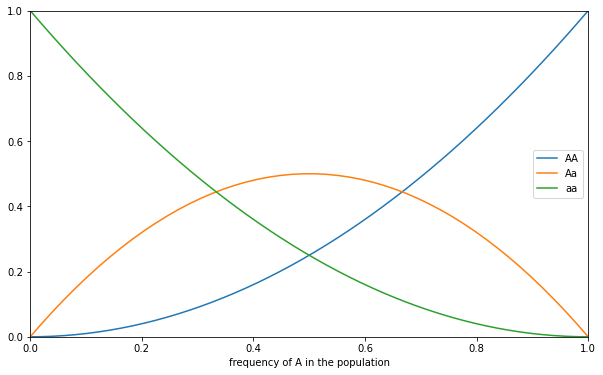

In [4]:
fig = plt.figure(figsize=(10, 6))
ax = plt.axes()

ax.plot(p_A, p_AA)
ax.plot(p_A, p_Aa)
ax.plot(p_A, p_aa)
ax.set_xlabel("frequency of A in the population")

ax.legend(["AA", "Aa", "aa"])
ax.set_xlim((0, 1))
ax.set_ylim((0, 1))

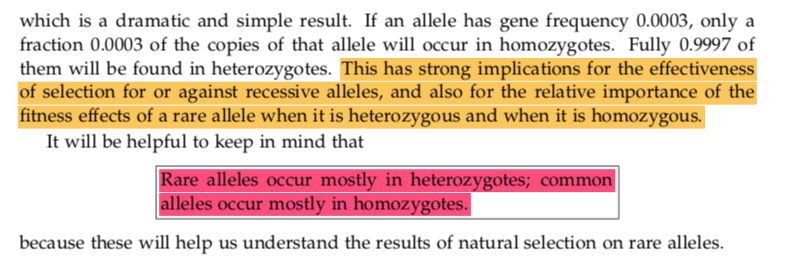

Homozygotes for a rare allele (frequency shown with the red dashed line) are very rare and mostly found in heterozygotes, common alleles (yellow dotted line) mostly found in homozygotes:

In [6]:
p_rare = 0.01
p_common = 0.9

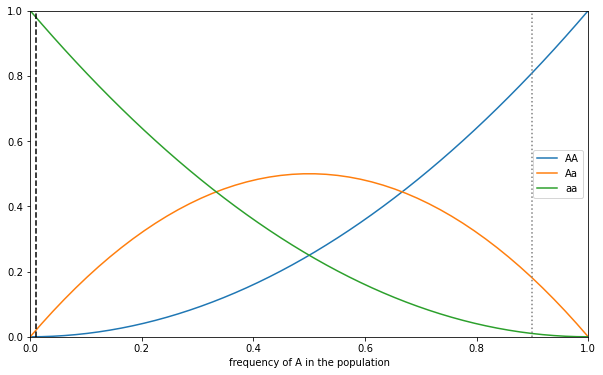

In [7]:
ax.axvline(p_rare, c="black", linestyle="dashed")
ax.axvline(p_common, c="gray", linestyle="dotted")
fig

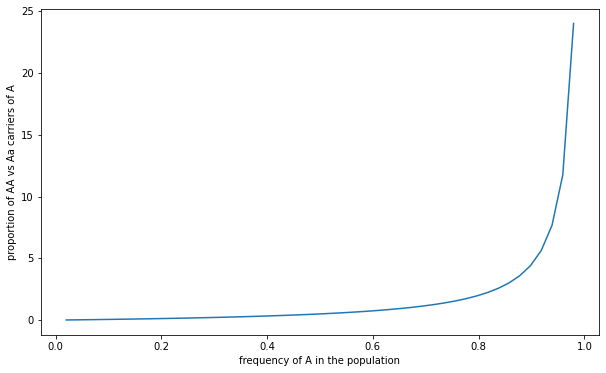

In [8]:
fig = plt.figure(figsize=(10, 6))
ax = plt.axes()

ax.plot(p_A[1:-1], p_AA[1:-1] / p_Aa[1:-1])

ax.set(xlabel="frequency of A in the population",
       ylabel="proportion of AA vs Aa carriers of A");

## Exercises

### Exercise 1.

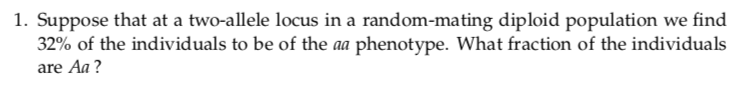

Given proportion of _aa_ homozygotes:

In [9]:
p_aa = 0.32

Frequence of a in the population is:

In [10]:
p_a = np.sqrt(p_aa)
p_a

0.565685424949238

Proportion of heterozygotes:

In [11]:
p_Aa = 2 * (1 - p_a) * p_a
p_Aa

0.491370849898476

Proportion of _AA_ homozygotes:

In [12]:
p_AA = (1 - p_a) ** 2

All three genotype proportions have to sum up to 1:

In [13]:
p_AA + p_Aa + p_aa

1.0

### Exercise 2.

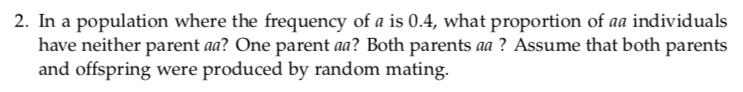

**Analytical solution**

Uses the fact that "random mating is equivalent to random union of gametes" (page 6). Choosing a gamete at random from a pool of gametes is equivalent to first selecting a parent at random, then selecting one gamete from it.

Initial input:

In [14]:
p_a = 0.4

From which follow individual genotype proportions:

In [15]:
p_AA, p_Aa, p_aa  = (1 - p_a)**2, 2 * p_a * (1 - p_a), p_a ** 2
p_AA, p_Aa, p_aa

(0.36, 0.48, 0.16000000000000003)

Solution:

* Neither parent is _aa_ - both alleles in the _aa_ offspring must come from an _Aa_ individual, but it had to contribute only the _a_ allele (so only 1/2 of its gametes):

In [16]:
i = 1/4 * p_Aa**2     # (1/2 * p_Aa)  *  (1/2 * p_Aa)
i

0.0576

* Exactly one parent is _aa_ - either the first _a_ was contributed by 1/2 of gametes of the _Aa_ parent and the second by _aa_ parent, or the other way around (logical OR, so both probabilities need to be added):

In [17]:
ii = p_aa * p_Aa     # [(1/2 * p_Aa) * p_aa]  +  [(1/2 * p_Aa) * p_aa]
ii

0.07680000000000001

* Both parents are _aa_ - equivalent to the probability of chosing two _aa_ parents.

In [18]:
iii = p_aa**2    # p_aa * p_aa
iii

0.02560000000000001

In [19]:
i + ii + iii

0.16000000000000003

In [20]:
(
    i / (i + ii + iii),
    ii / (i + ii + iii),
    iii / (i + ii + iii)
)

(0.35999999999999993, 0.4799999999999999, 0.16000000000000003)

<hr>

**Simulation solution**

Initial input:

In [21]:
p_a = 0.4

In [22]:
p_AA, p_Aa, p_aa  = (1 - p_a)**2, 2 * p_a * (1 - p_a), p_a ** 2
p_AA, p_Aa, p_aa

(0.36, 0.48, 0.16000000000000003)

Generate initial population of parents in HWE:

In [23]:
n = 1000000
inds = \
    int(p_AA * n) * [("A", "A")] + \
    int(p_Aa * n) * [("A", "a")] + \
    int(p_aa * n) * [("a", "a")]

Verify:

In [24]:
pd.Series(inds).value_counts()

(A, a)    480000
(A, A)    360000
(a, a)    160000
dtype: int64

In [25]:
_ / n

(A, a)    0.48
(A, A)    0.36
(a, a)    0.16
dtype: float64

Simulate mating:

In [26]:
# create an entirely new generation of offspring, replacing previous
# generation of parents
offspring = []
for j in enumerate(inds):
    # randomly choose parents
    parent1 = random.choice(inds)
    parent2 = random.choice(inds)

    # randomly choose gametes from each parent
    x = random.choice(parent1)
    y = random.choice(parent2)

    # generate child
    child = sorted((x, y))

    offspring.append(("".join(child), "".join(parent1), "".join(parent2)))

offspring = pd.DataFrame(offspring, columns=["child", "parent1", "parent2"])

Verify that I simulated offspring population in Hardy-Weinberg:

In [27]:
offspring.child.value_counts() / n

Aa    0.479477
AA    0.360392
aa    0.160131
Name: child, dtype: float64

Subset to only _aa_ offspring:

In [28]:
aa = offspring.query("child == 'aa'").reset_index()

* Proportion of _aa_ offspring with neither parent _aa_:

In [29]:
len(aa.query("parent1 != 'aa' & parent2 != 'aa'"))

57794

In [30]:
_ / len(aa)

0.36091699920689935

* Proportion of _aa_ offspring with one parent _aa_:

In [31]:
len(aa.query("(parent1 == 'aa' & parent2 == 'Aa') | (parent1 == 'Aa' & parent2 == 'aa')"))

76755

In [32]:
_ / len(aa)

0.4793263015905727

* Proportion of _aa_ offspring with both parents _aa_:

In [33]:
len(aa.query("parent1 == 'aa' & parent2 == 'aa'"))

25582

In [34]:
_ / len(aa)

0.15975669920252794

### Exercise 3.

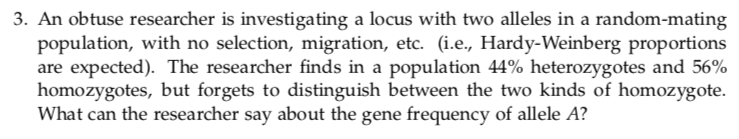

There is not enough information to calculate the frequency of _A_. Solving for the frequency based on $p_A^2 + 2p_A(1-p_A) + (1-p_A)^2 = 1$ is not possible, because the equation has infinitely many solutions.

We were given

$2p_A(1-p_A) = 0.44$

$p_A^2 + (1-p_A)^2 = 0.56$

### Exercise 4.

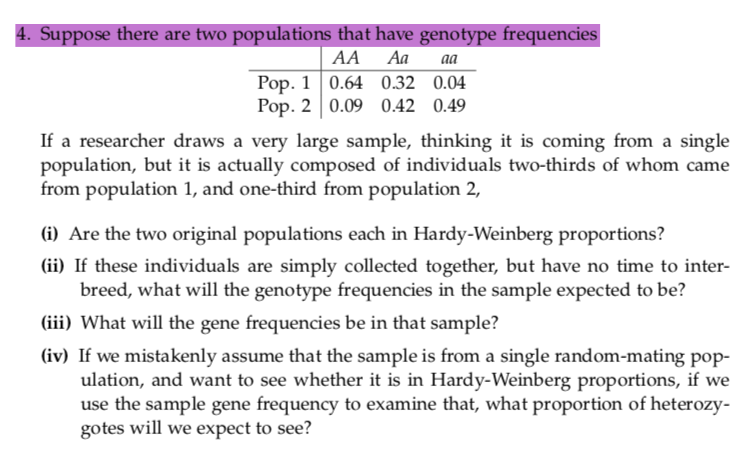

**(i) Hardy-Weinberg $\chi^2$ test**

Observed proportions:

In [35]:
gt_obs = np.array([[.64, .32, .04],
                   [.09, .42, .49]])
gt_obs

array([[0.64, 0.32, 0.04],
       [0.09, 0.42, 0.49]])

Calculate frequency of _A_:

In [236]:
freq_A = gt_obs[:, 0] + 1/2 * gt_obs[:, 1]
freq_A

array([0.8, 0.3])

In [38]:
freq_A = np.sqrt(gt_obs[:, 0])
freq_A

array([0.8, 0.3])

Expectation of genotype proportions based on the allele frequency:

In [39]:
gt_exp = np.array([freq_A**2, 2 * freq_A * (1 - freq_A), (1 - freq_A)**2]).T

In [40]:
gt_exp

array([[0.64, 0.32, 0.04],
       [0.09, 0.42, 0.49]])

These are the same as the observed. We can also test formally:

Test for population 1:

In [41]:
chisquare(gt_obs[0], gt_exp[0])

Power_divergenceResult(statistic=3.9722305102986745e-32, pvalue=1.0)

Test for population 2:

In [42]:
chisquare(gt_obs[1], gt_exp[1])

Power_divergenceResult(statistic=6.288750838815466e-33, pvalue=1.0)

**(ii)**

In [43]:
gt_draw = 2/3 * gt_obs[0] + 1/3 * gt_obs[1]
gt_draw

array([0.45666667, 0.35333333, 0.19      ])

Simulation solution:

In [80]:
n = 1000000
n_draw1, n_draw2 = int(2/3 * n), int(1/3 * n)

# simulate 2/3 and 1/3 proportional draw of genotypes based proportions
# of genotypes observed in both populations
draw = pd.Series(
    [random.choices(["AA", "Aa", "aa"], weights=gt_obs[0])[0] for i in range(n_draw1)] + \
    [random.choices(["AA", "Aa", "aa"], weights=gt_obs[1])[0] for i in range(n_draw2)]
)

In [81]:
draw.value_counts() / n

AA    0.455931
Aa    0.353946
aa    0.190122
dtype: float64

**(iii)**

Allele frequency calculated from the calculated genotype proportions of the drawn sample:

In [82]:
gt_draw

array([0.45666667, 0.35333333, 0.19      ])

$\textrm{freq}_A = \sqrt{p_{AA}^2}$

or

$\textrm{freq}_A = p_{AA}^2 + \frac{1}{2} p_{Aa}$

In [86]:
np.sqrt(gt_draw[0])

0.6757711644237764

In [84]:
gt_draw[0] + 1/2 * gt_draw[1]

0.6333333333333333

🤔 <font color = "red">Why are these two different?</font> -> Wahlund effect (see below for more on this)

Allele frequency should also be a weighted sum of the frequences of _A_ in the original populations?

In [89]:
sum([2/3 * freq_A[0], 1/3 * freq_A[1]])

0.6333333333333333

Using the simulated draw of $n$ genotypes from both populations generated earlier:

In [93]:
(sum(draw == "AA") + 1/2 * sum(draw == "Aa")) / len(draw)

0.632904632904633

**(iv)**

In [97]:
sample_freq = gt_draw[0] + 1/2 * gt_draw[1]

Proportion of heterozygotes expected under the assumption that the drawn sample is randomly-mating:

In [99]:
2 * sample_freq * (1 - sample_freq)

0.46444444444444444

This is higher than the heterozygote proportions in both populations! Wahlund effect. Overestimation of heterozygosity when population structure is not taken into account.

In fact, what we expect _knowing_ it's not random mating:

In [107]:
2/3 * gt_obs[0, 1] + 1/3 * gt_obs[1, 1]

0.3533333333333333

Also clear from the simulated draws:

In [110]:
sum(draw == "Aa") / len(draw)

0.35394635394635393

## Problems

### Problem 3

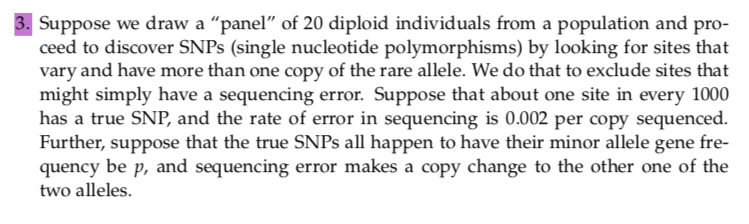

* $p = 0.001$ - heterozygosity (proportion of sites carrying a true SNP)
* $\epsilon = 0.002$ - sequencing error
* $n = 20$ - number of individuals

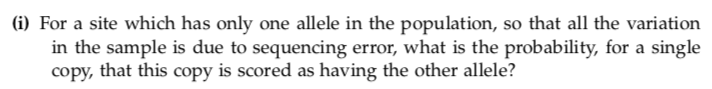

This probability is equal to the sequencing error $\epsilon$.

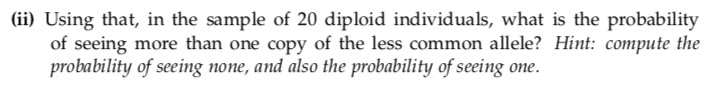

Probability of seeing one error: $P[\textrm{1 error}] = \binom{2n - 1}{1} \times (1-\epsilon)^{2n-1} \times \epsilon$

Probability of seeing no error: $P[\textrm{no error}] = (1-\epsilon)^{2n}$

Probability of seeing more than one allele = $1 - (P[\textrm{1 error}] + P[\textrm{no error}])$

In [114]:
from scipy.stats import binom

In [117]:
# binom.pmf(k) = choose(n, k) * p**k * (1-p)**(n-k)

In [116]:
binom.ppf(0.5, 10, 5)

nan

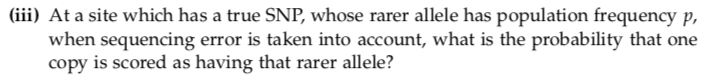

$(1 - p) \times \epsilon + p \times (1 - \epsilon)$

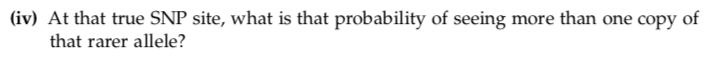

Using (iii) and calling this f.

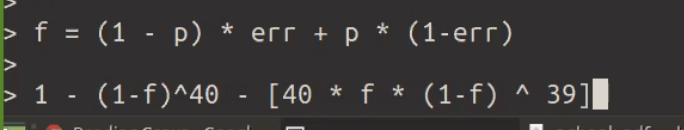

We don't have to condition on errors anymore, because it's already part of the compound parameter $f$.

**(v)**

Bayes?

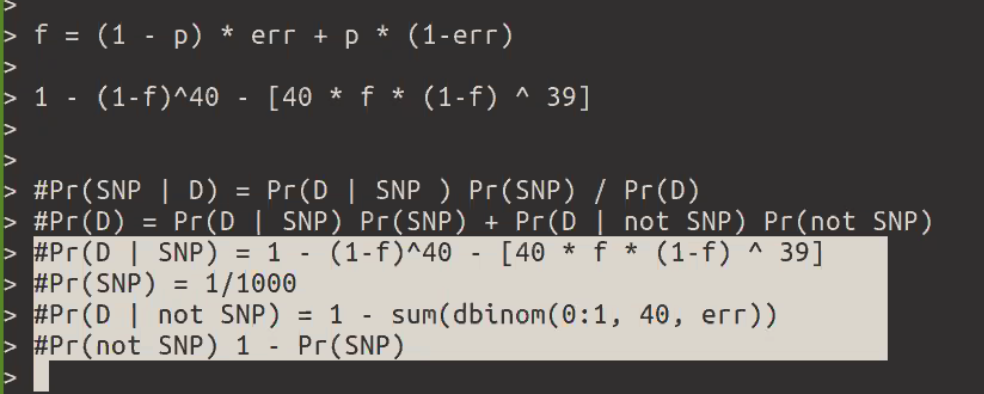

**(vi)**

how to change (v) to do that?

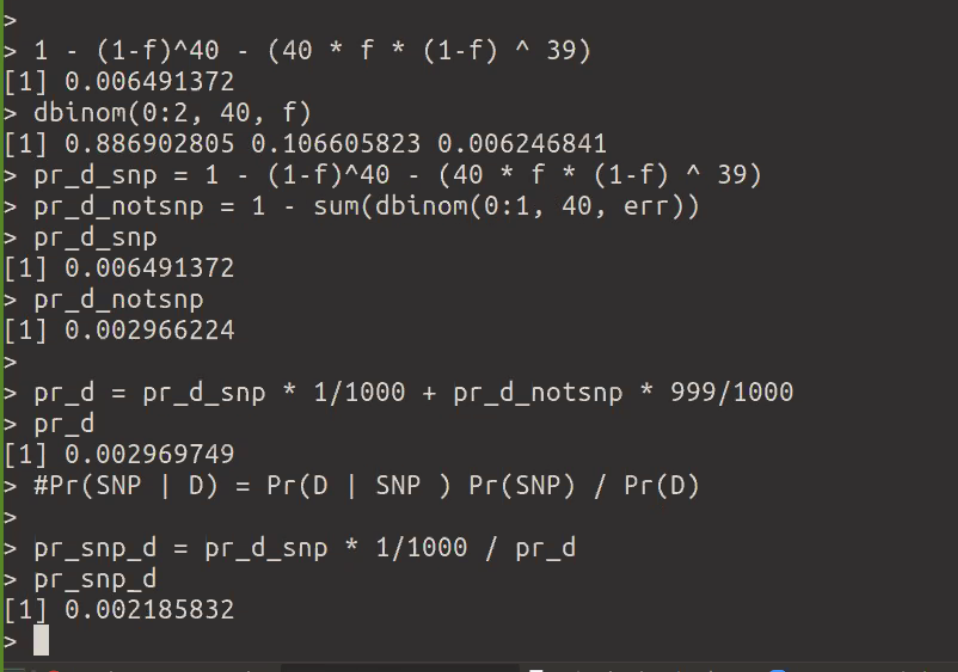

fora very rare allele almost all snps we find will be errors

that's because the error rate is much higher than the allele frequency

now if we do something less pessimistic: p = 0.01

in this case:

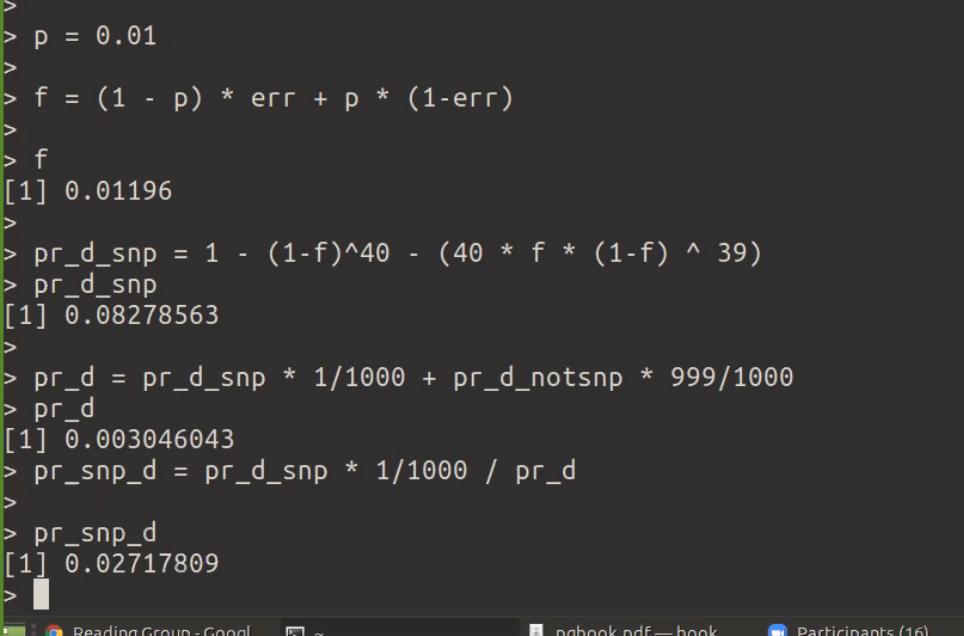

note this is assuming we would do all of that on a single chromosome! snp discovery using a single sequence

of course, realistically, we would have multiple fold coverage

but for that we would need a slightly more complicated model - we would have `Pr(reads | given a GT, err rat per read)`

that's why we do high coverage genomes - helps us decide which genotypes are real SNPs and which are not

problem 4

* first question

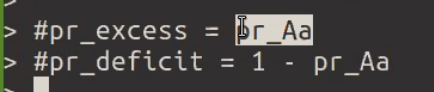

both of these probabilities will be the same when p_Aa = 0.5, or when p_Aa = 0 (everyone is homozygote in the real population)

* second questions

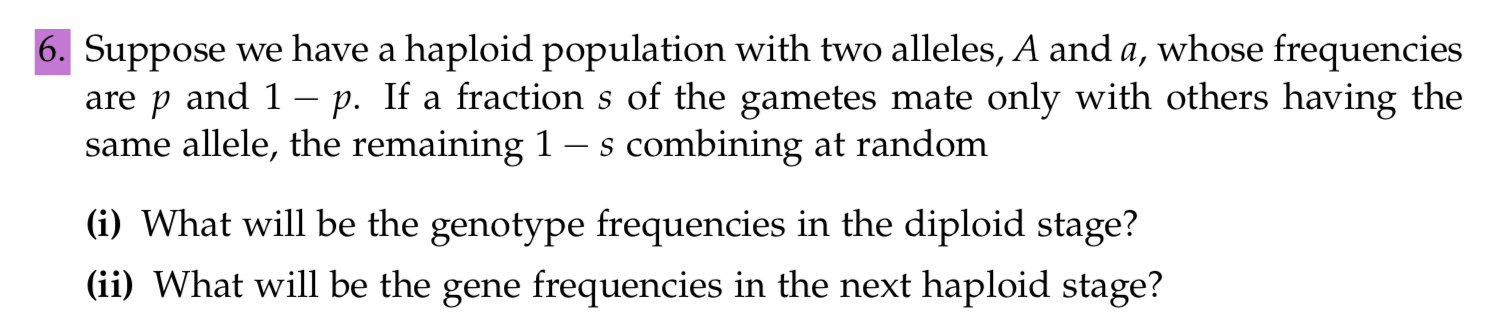

very topical about things we're all doing

(i)

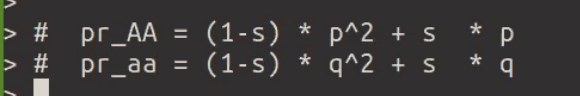

hets will be lower because they will never be only produced by those mating at random

(ii)

the number of hets will change, but not the gene frequencies

In which context is this type of calculation useful?

Inbreeding!

$s$ here would be the inbreeding coefficient



also, in the context of the exercise 4, if the pops were fixed for different allele, $s$ would be equal to fst?

(fst - excess of heterozygosity compared to randomly mating population??? is this true? didn't get 100% what ben said)